非線形システムのIEKFによる推定

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N = 60
L = 3
q = 0.16
r = 0.1
a = 0.9
b = 0.5

def u(t):
    return np.sin(2*np.pi*t/25)

def f(x, t):
    return a*x+b*u(t)

def obs(x):
    return np.tanh(x)

x = np.zeros(N)  # 状態ベクトル(真値)
y = np.zeros(N)  # 観測ベクトル

In [16]:
x[0] = 0

for i in range(1,N):
    x[i] = f(x[i-1],i) + np.random.normal(0,q)
    y[i] = obs(x[i]) + np.random.normal(0, r)

In [17]:
# IEKF
xp = np.zeros(N)
Pp = np.zeros(N)
itr = np.zeros(L)

xp[0] = 0
Pp[0] = 10

xu = np.copy(xp)
Pu = np.copy(Pp)

for i in range(1,N):
    # 時間更新ステップ
    xp[i] = f(xu[i-1],i)
    F = 0.9  # ヤコビアン
    Pp[i] = F*Pu[i-1]*F + q
    # 観測更新ステップ
    itr[0] = xp[i]
    for l in range(1,L):
        H = 1/pow(np.cosh(xp[i]),2)  # ヤコビアン
        K = Pp[i]*H/(H*Pp[i]*H+r)
        itr[l] = xp[i] + K*(y[i]-obs(itr[l-1])-H*(xp[i]-itr[l-1]))
    xu[i] = itr[-1]
    Pu[i] = Pp[i]-K*H*Pp[i]

Text(0.5, 0, 'Number of steps t')

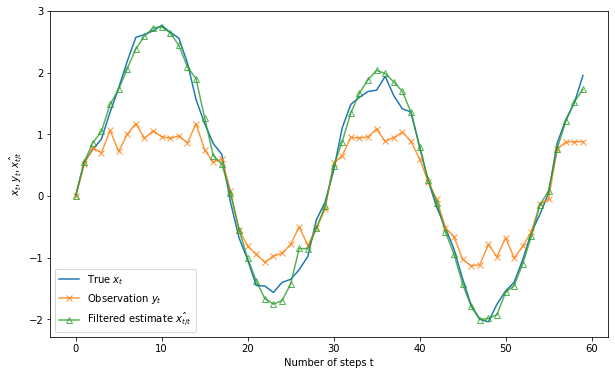

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x, label="True $x_t$")
plt.plot(y, marker="x", alpha=0.8, label="Observation $y_t$")
plt.plot(xu, marker="^", alpha=0.8, markerfacecolor="None", label="Filtered estimate $\hat{x_{t/t}}$")
plt.legend()
plt.ylabel("$x_t,y_t,\hat{x_{t/t}}$")
plt.xlabel("Number of steps t")